In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
tf.__version__

'2.5.0'

In [4]:
#import mnist dataset

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()


#Scale data
x_train, x_test = x_train/255.0,x_test/255.0
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [6]:
#build the ann model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation= "softmax")
])

In [9]:
#Compile the mode

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

r = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1437 - accuracy: 0.9578 - val_loss: 0.0960 - val_accuracy: 0.9717
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1062 - accuracy: 0.9679 - val_loss: 0.0862 - val_accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0869 - accuracy: 0.9734 - val_loss: 0.0777 - val_accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0754 - accuracy: 0.9767 - val_loss: 0.0725 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0641 - accuracy: 0.9798 - val_loss: 0.0703 - val_accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0601 - accuracy: 0.9808 - val_loss: 0.0715 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9821 - val_loss: 0.0757 - val_accuracy:

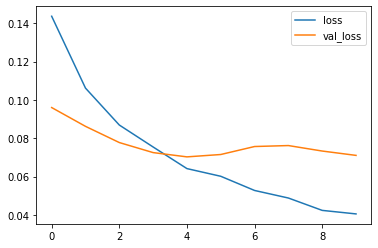

In [11]:
#plot loss per iteration (epoch)

plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

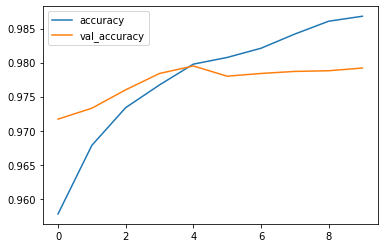

In [14]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [15]:
#Evaluate the model by test daa
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 983us/step - loss: 0.0710 - accuracy: 0.9792
[0.07103653997182846, 0.979200005531311]


### Examine the error cases (digits)



Confusion matrix, without normalization
[[ 971    0    1    1    0    2    1    1    2    1]
 [   0 1121    3    2    0    1    3    0    5    0]
 [   2    1 1003    7    1    1    3    5    9    0]
 [   0    0    3  998    0    2    0    3    2    2]
 [   1    0    0    1  956    0    5    1    0   18]
 [   2    0    0   12    1  870    4    0    1    2]
 [   4    3    2    1    1    7  939    0    1    0]
 [   2    6    7    3    0    0    0 1004    1    5]
 [   4    0    1    2    3    4    3    5  948    4]
 [   1    3    0    7    7    6    0    2    1  982]]


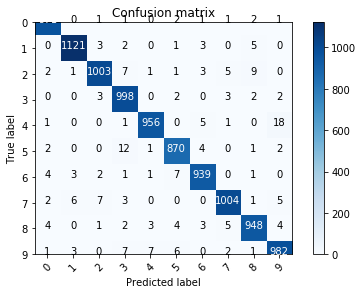

In [16]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 